Note: Use this template to develop your project. Do not change the steps. For each step, you may add additional cells if needed.

#### Group Information

Group No: 

- Member 1: 
- Member 2:
- Member 3:
- Member 4:

In [29]:
%config Completer.use_jedi=False
import pandas as pd
import tensorflow as tf


#### Load the dataset

In [30]:
dataset = pd.read_csv('classification_dataset.csv')

#### Define the loss function

In [31]:
def loss_fn(y_true, y_pred):
    """
    This function calculates the loss function
    """
    return tf.reduce_mean(tf.square(y_true - y_pred))

#### Define function to perform prediction

In [32]:
def sigmoid(x):
    """ 
    This function calculates the sigmoid function.
    """
    return 1 / (1 + tf.exp(-x))

def relu(x):
    """ 
    This function calculates the ReLU function.
    """
    return tf.maximum(0, x)

def forward(inputs, weights, biases):
    """ 
    This function calculates the forward pass (predicts the label).
    """
    hidden_output = relu(tf.matmul(inputs, weights[0]) + biases[0])
    output = tf.matmul(hidden_output, weights[1]) + biases[1]
    return output

#### Define function for model training
Display the training and validation loss values for each epoch of the training loop. The displayed value must be in 6 decimal places.<br>
Hint: <br>
Use `tf.GradientTape` to compute the gradients.

In [33]:
import tensorflow as tf

def train(model, optimizer, x_train, y_train, weights, biases):
    with tf.GradientTape() as tape:
        predictions = model(x_train, weights, biases)
        loss = tf.reduce_mean(tf.square(predictions - y_train))  # Mean Squared Error loss
    
    gradients = tape.gradient(loss, weights + biases)
    optimizer.apply_gradients(zip(gradients, weights + biases))
    return loss



def fit(model, optimizer, train_data, valid_data, weights, biases, epochs, batch_size, patience):
    train_losses = []
    valid_losses = []
    best_valid_loss = float('inf')
    epochs_no_improve = 0
    
    for epoch in range(epochs):
        print("Epoch {}/{}".format(epoch + 1, epochs))
        epoch_train_loss = 0.0
        
        # Mini-batch training loop
        for batch in range(len(train_data[0]) // batch_size):
            start = batch * batch_size
            end = start + batch_size
            x_batch = train_data[0][start:end]
            y_batch = train_data[1][start:end]
            batch_loss = train(model, optimizer, x_batch, y_batch, weights, biases)
            epoch_train_loss += batch_loss.numpy()
        
        epoch_train_loss /= len(train_data[0]) // batch_size
        train_losses.append(epoch_train_loss)
        print("Epoch Train Loss: {:.6f}".format(epoch_train_loss))
        
        # Validation loss
        val_predictions = model(valid_data[0], weights, biases)
        val_loss = tf.reduce_mean(tf.square(val_predictions - valid_data[1]))
        valid_loss = val_loss.numpy()
        valid_losses.append(valid_loss)
        print("Epoch Valid Loss: {:.6f}".format(valid_loss))
        
        # Early stopping
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            epochs_no_improve = 0
        else:
            epochs_no_improve += 1
            if epochs_no_improve == patience:
                print("Early stopping! No improvement in validation loss for {} epochs.".format(patience))
                break
    
    return train_losses, valid_losses

#### Define the tensors to hold the weights and biases (create the model)
Hint: <br>
Use `tf.Variable` to create the tensors.<br>
Put the tensors in a list.

In [34]:
# Define the dimensions of the layers
input_dim = 5  # This should be the number of input features
hidden_dim = 20  # This can be any number you choose
output_dim = 1  # This should be the number of output classes

# Initialize the weights and biases with random values
weights = [
    tf.Variable(tf.random.normal([input_dim, hidden_dim]), name='W1'),
    tf.Variable(tf.random.normal([hidden_dim, output_dim]), name='W2')
]

biases = [
    tf.Variable(tf.zeros([hidden_dim]), name='b1'),
    tf.Variable(tf.zeros([output_dim]), name='b2')
]

#### Split the dataset
The ratio of training and test is 7:1:2.

In [35]:
from sklearn.model_selection import train_test_split

# Assuming dataset is your dataset
X = dataset.drop('label', axis=1)
y = dataset['label']

# Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=None)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.125, random_state=None)  # 0.125 x 0.8 = 0.1

# Print the lengths of each set
print("Length of training set:", len(X_train))
print("Length of validation set:", len(X_val))
print("Length of test set:", len(X_test))


Length of training set: 700
Length of validation set: 100
Length of test set: 200


#### Normalize the data

In [36]:
from sklearn.preprocessing import StandardScaler


# Initialize a new StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Use the same scaler to transform the validation and test data
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


#### Train the model

In [37]:
# Define your model here
model = forward

# Define your optimizer
optimizer = tf.optimizers.Adam(learning_rate=0.01)

# Convert your datasets to TensorFlow tensors
X_train_tensor = tf.convert_to_tensor(X_train_scaled, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train.values, dtype=tf.float32)
X_val_tensor = tf.convert_to_tensor(X_val_scaled, dtype=tf.float32)
y_val_tensor = tf.convert_to_tensor(y_val.values, dtype=tf.float32)


#Change parameter as needed
epochs = 200
batch_size = 32
patience = 5

# Train the model
train_losses, valid_losses = fit(model, optimizer, (X_train_tensor, y_train_tensor), (X_val_tensor, y_val_tensor), weights, biases, epochs, batch_size, patience)


Epoch 1/200


Epoch Train Loss: 13.610269
Epoch Valid Loss: 5.435798
Epoch 2/200
Epoch Train Loss: 3.600286
Epoch Valid Loss: 2.455524
Epoch 3/200
Epoch Train Loss: 1.881054
Epoch Valid Loss: 1.462187
Epoch 4/200
Epoch Train Loss: 1.303354
Epoch Valid Loss: 1.085998
Epoch 5/200
Epoch Train Loss: 0.994420
Epoch Valid Loss: 0.872271
Epoch 6/200
Epoch Train Loss: 0.811069
Epoch Valid Loss: 0.742512
Epoch 7/200
Epoch Train Loss: 0.691315
Epoch Valid Loss: 0.664450
Epoch 8/200
Epoch Train Loss: 0.609126
Epoch Valid Loss: 0.611956
Epoch 9/200
Epoch Train Loss: 0.550741
Epoch Valid Loss: 0.573219
Epoch 10/200
Epoch Train Loss: 0.507067
Epoch Valid Loss: 0.542641
Epoch 11/200
Epoch Train Loss: 0.474141
Epoch Valid Loss: 0.516146
Epoch 12/200
Epoch Train Loss: 0.448739
Epoch Valid Loss: 0.493344
Epoch 13/200
Epoch Train Loss: 0.428321
Epoch Valid Loss: 0.473809
Epoch 14/200
Epoch Train Loss: 0.410885
Epoch Valid Loss: 0.457131
Epoch 15/200
Epoch Train Loss: 0.395902
Epoch Valid Loss: 0.442289
Epoch 16/200
Ep

#### Display the training loss and validation loss against epoch graph

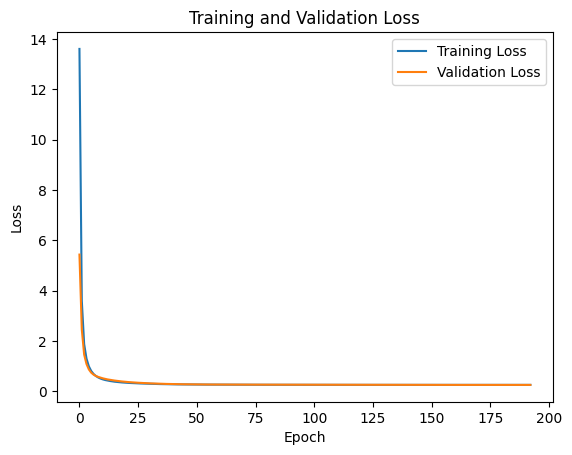

In [38]:
import matplotlib.pyplot as plt

# Plot training and validation losses
plt.plot(train_losses, label='Training Loss')
plt.plot(valid_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


#### Predict the test set

In [39]:
# Convert your test set to TensorFlow tensors
X_test_tensor = tf.convert_to_tensor(X_test_scaled, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test.values, dtype=tf.float32)

# Use the model to make predictions on the test set
test_predictions = model(X_test_tensor, weights, biases)

# Convert the predictions tensor to a NumPy array
test_predictions_np = test_predictions.numpy()

# Calculate the test loss using the provided loss function
test_loss = loss_fn(y_test_tensor, test_predictions)

# Display the test loss
print("Test Loss: {:.6f}".format(test_loss.numpy()))


Test Loss: 0.256635


#### Display the confusion matrix and the classification report.

In [40]:
from sklearn.metrics import confusion_matrix, classification_report

# Convert predicted probabilities to binary predictions
threshold = 0.5
predicted_classes = (test_predictions_np >= threshold).astype(int)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_tensor.numpy(), predicted_classes)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate classification report
class_report = classification_report(y_test_tensor.numpy(), predicted_classes)

# Print classification report
print("\nClassification Report:")
print(class_report)


Confusion Matrix:
[[61 41]
 [84 14]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.42      0.60      0.49       102
         1.0       0.25      0.14      0.18        98

    accuracy                           0.38       200
   macro avg       0.34      0.37      0.34       200
weighted avg       0.34      0.38      0.34       200

